# US county-level data analysis solution

### US county-level sociodemographic and health resource data (2018-2019)

Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any **relationship between health resources and sociodemographic data.**

To do this, you need to set a target variable (health-related) to conduct the analysis.




#### Step 3: Build a linear regression model in python

Start solving the problem by implementing a linear regression model and analyze the results. Then, using the same data and default attributes, build a Lasso model and compare the results with the baseline linear regression.

Analyze how $R^2$ evolves when the hyperparameter of the Lasso model changes (you can, for example, start testing from a value of 0.0 and work your way up to a value of 20). Draw these values in a line diagram.

#### Step 4: Optimize the previous linear regression model using python

After training the Lasso model, if the results are not satisfactory, optimize it using one of the techniques seen above.

### 🟠**Step 0: Libraries | Modules | Functions Definition**

In [2]:
''' 
En este caso definiremos la funcion:
📌📌📌 count_nan_zeros_uniques 📌📌📌
que se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.
'''
def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

### **🟠Step 1: Loading the CSV into a python dataset**

>The dataset can be found in this project folder under the name demographic_health_data.csv. You can load it into the code directly from the link:
>
>https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv
>
>Or download it and add it by hand in your repository. 

>**⭐CARGAR EL DATASET**

In [3]:
import pandas as pd

# Cargamos el dataset directamente desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df_raw = pd.read_csv(url)



>**⭐DATA DICTIONARY**  
>In this dataset you will find a large number of variables, which you will find defined in the [data_dictionary](/workspaces/Project_ML_Linear_Regression_regularized_VL/data_dictionary.xlsx).  
>O puedes verlo mas abajo:

In [4]:
from IPython.display import display, HTML

# Leer el archivo Excel
data_dict = pd.read_excel("data_dictionary.xlsx", engine="openpyxl")

# Mostrar toda la tabla en HTML sin cortar nada
html = data_dict.to_html(max_rows=None, max_cols=None)

# Si querés mostrar toda la tabla pero solo para esa celda 
# (sin afectar la configuración global de pandas), 
# podés usar una solución con IPython.display y to_html().

# Estilo CSS para alinear a la izquierda
css = """
<style>
    table { text-align: left !important; }
    th, td { text-align: left !important; padding: 4px; }
</style>
"""

# Mostrar tabla con estilo aplicado
display(HTML(css + html))

,Feature,Unnamed: 1,Unnamed: 2
0,fips,FIPS Code for the County,Column1
1,TOT_POP,Total Population,This data as well as all Age and Race data is pulled from the 2019 Population Estimates of the US Census
2,0-9,Population aged 0-9,All of the other age columns are the same but with varying age
3,0-9 y/o % of total pop,% of the population aged 0-9,NaN
4,10-19',NaN,NaN
5,10-19 y/o % of total pop,NaN,NaN
6,20-29,NaN,NaN
7,20-29 y/o % of total pop,NaN,NaN
8,30-39,NaN,NaN
9,30-39 y/o % of total pop,NaN,NaN


---

### **🟠Step 2: Perform a full EDA (Exploratory Data Analysis)**

>This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.
>
>Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

---

> **⭐EXPLORING THE DATA**

In [5]:
# Miramos un sample del df
df_raw.sample(10,random_state=2025)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
120,5023,24965,2423,9.7,2757,11.0,2332,9.3,2541,10.2,...,2302,14.6,13.3,15.8,2946,3.9,3.6,4.2,790,6
686,17187,17032,2047,12.0,2427,14.2,2193,12.9,1901,11.2,...,1175,11.5,10.5,12.5,1525,3.2,3.0,3.5,430,6
3098,55105,163129,19981,12.2,21849,13.4,19982,12.2,20353,12.5,...,8680,10.4,9.5,11.2,13020,3.0,2.8,3.3,3784,4
1512,29063,12630,1193,9.4,1189,9.4,1835,14.5,1942,15.4,...,984,12.0,11.1,13.0,1258,3.1,2.9,3.3,322,4
2836,51036,6941,536,7.7,636,9.2,734,10.6,670,9.7,...,600,17.7,16.7,18.7,1043,4.3,4.1,4.6,254,2
4,1009,57840,7095,12.3,7570,13.1,6742,11.7,6884,11.9,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
2559,48077,10456,1041,10.0,1271,12.2,998,9.5,1070,10.2,...,771,13.5,12.3,14.6,1125,3.5,3.3,3.8,294,4
2727,48413,2895,339,11.7,490,16.9,293,10.1,384,13.3,...,154,14.2,13.3,15.1,306,3.4,3.2,3.7,74,6
2311,44005,82542,7243,8.8,9194,11.1,10520,12.7,9527,11.5,...,4598,9.3,8.4,10.4,6410,2.8,2.6,3.1,1922,2
1306,26155,68192,7384,10.8,8728,12.8,8258,12.1,7597,11.1,...,5037,11.0,10.1,11.9,5936,3.1,2.9,3.4,1682,5


In [6]:
# ==============================================================
# EXPLORAMOS LA ESTRUCTURA DEL DATASET 
# ==============================================================

# Dimensión del dataset
print("Shape:", df_raw.shape)

# Nombres de las columnas
print("Columnas:")
print(df_raw.columns.tolist())

# Información general (tipos de datos, nulos, etc.)
df_raw.info()


Shape: (3140, 108)
Columnas:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
#  🧠 Lo que observamos del dataset
# ==============================================================
#  📊 108 columnas → es bastante grande, lo que hace que la limpieza sea importante.
#  🧮 Tipos de datos:
#      61 columnas tipo float64 (decimales)
#      45 tipo int64
#       2 tipo object (seguramente nombres de condados/estados)
#  🔍 Algunas columnas tienen nombres un poco largos y otros hasta con símbolos 
#     (esto puede traernos problemas más adelante si no los limpiamos).

In [9]:
# ==============================================================
# VERIFICAR VALORES NULOS
# ==============================================================
# Esto te va a mostrar columnas que tienen valores faltantes. En base a eso podemos:
#     Eliminar columnas con muchos nulos
#     Imputar (rellenar) nulos con media/mediana o valor más frecuente
#     Eliminar filas, si tiene sentido
#     Ignoramos algunas si no aportan valor

# Total de valores nulos por columna
nulls = df_raw.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [10]:
# ==============================================================
# ESTADISTICA DESCRIPTIVA
# ==============================================================
# Podés ver si hay variables con escalas raras, outliers, etc.

# Estadísticas para columnas numéricas
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,"3,140.0","30,401.6","15,150.6","1,001.0","18,180.5","29,178.0","45,081.5","56,045.0"
TOT_POP,"3,140.0","104,189.4","333,583.4",88.0,"10,963.2","25,800.5","67,913.0","10,105,518.0"
0-9,"3,140.0","12,740.3","41,807.3",0.0,"1,280.5","3,057.0","8,097.0","1,208,253.0"
0-9 y/o % of total pop,"3,140.0",11.9,2.1,0.0,10.6,11.8,13.0,25.5
19-Oct,"3,140.0","13,368.0","42,284.4",0.0,"1,374.5","3,274.0","8,822.2","1,239,139.0"
...,...,...,...,...,...,...,...,...
CKD_prevalence,"3,140.0",3.4,0.6,1.8,3.1,3.4,3.8,6.2
CKD_Lower 95% CI,"3,140.0",3.2,0.5,1.7,2.9,3.2,3.5,5.8
CKD_Upper 95% CI,"3,140.0",3.7,0.6,1.9,3.3,3.7,4.1,6.6
CKD_number,"3,140.0","2,466.2","7,730.4",3.0,314.8,718.0,"1,776.2","237,766.0"


In [11]:
# 🧠 Interpretación del output:
# ====================================================================================
# 🔝 Variables más correlacionadas con Heart disease_prevalence:
# Muchos de los valores más correlacionados son estimaciones relacionadas o derivadas 
# directamente del target, como:
#     Heart disease_Upper 95% CI y Heart disease_Lower 95% CI 
#           → ❌ No las uses como input, porque son prácticamente el mismo valor que el target.
#     Otras condiciones de salud como CKD_prevalence, COPD_prevalence, diabetes_prevalence, etc. 
#           → ✅ Podrían ser buenas features si querés ver cómo distintas condiciones afectan 
#             a la prevalencia de enfermedad cardíaca.
#     CI90LBINC_2018 (percentil inferior del ingreso familiar) 
#           → ❗ interesante ver que está negativamente correlacionado 
#           → a menor ingreso, mayor prevalencia de enfermedad cardíaca.

In [12]:
# 🔥 Features sugeridas (Seleccionar columnas para el modelo)
# ====================================================================================
#    Variables permitidas para usar (no son leaks del target):

selected_features = [
    'CKD_prevalence',
    'COPD_prevalence',
    'diabetes_prevalence',
    'anycondition_prevalence',
    'CI90LBINC_2018',           # Lower bound household income
    'Unemployment_rate_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'PCTPOVALL_2018',           # % Pobreza
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)'
]

#   Eliminar columnas no útiles
#   Además de ignorar las *_Upper 95% CI y *_Lower 95% CI, también podés descartar:
#     → Identificadores: 'fips', 'STATE_FIPS', 'CNTY_FIPS'
#     → Nombres: 'COUNTY_NAME', 'STATE_NAME'
#     → Columnas duplicadas o redundantes: como 'Total Population' si ya tenés 'TOT_POP', etc.

In [13]:
# ==============================================================
# VISUALIZACIONES: HISTPLOT y HEATMAP (Opcional pero Recomendable)
# ==============================================================

# 📌  Hacelo antes de preparar X e y, porque estas visualizaciones son parte del EDA, y ahí 
#     todavía estás trabajando con el DataFrame completo (df_raw), no sólo con los features 
#     seleccionados.
# 📌 ¿Por qué conviene hacerlo antes?
#     ✓ El histograma del target (Heart disease_prevalence) te ayuda a ver si tiene una distribución
#       normal, sesgada, con outliers, etc.
#         → esto informa tu estrategia de modelado (por ejemplo, si más adelante necesitás 
#           hacer log-transform).
#     ✓ El heatmap de correlaciones es más útil cuando todavía no filtraste columnas. 
#       Te da un panorama global para:
#         → Detectar variables duplicadas o altamente correlacionadas entre sí (multicolinealidad)
#         → Elegir mejores features (evitar usar muchas que digan lo mismo)
# 📌 Entonces el orden sería idealmente así:
#     1. Cargar el dataset
#     2. .info(), .describe(), .isnull() → Diagnóstico general
#     3. Elegir la variable target 
#     4. Visualizaciones (histplot, heatmap)
#     5. Análisis de correlaciones con el target
#     6. Selección de columnas (features)
#     7. Definir X e y

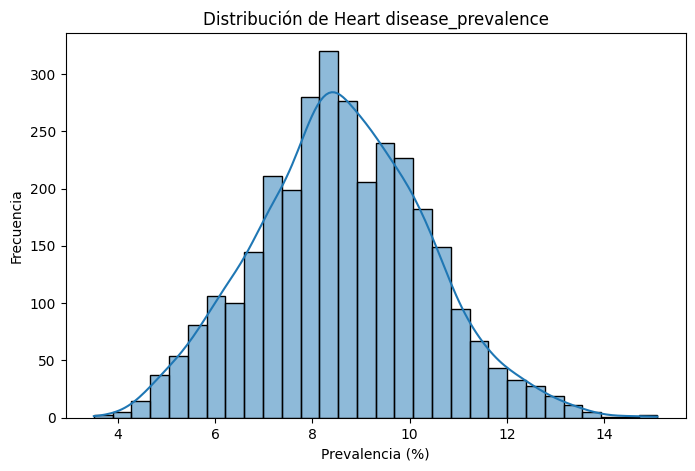

In [14]:
# Histograma del target (Heart disease_prevalence)
# ==============================================================
# Este gráfico te va a mostrar la forma de la distribución de tu variable objetivo.

# ¿Qué deberías observar?
#    ¿Tiene forma de campana (normal)?
#    ¿Está sesgada hacia la izquierda o derecha?
#    ¿Hay outliers?

import matplotlib.pyplot as plt
import seaborn as sns

target = 'Heart disease_prevalence'

plt.figure(figsize=(8, 5))
sns.histplot(df_raw[target], bins=30, kde=True)
plt.title(f'Distribución de {target}')
plt.xlabel('Prevalencia (%)')
plt.ylabel('Frecuencia')
plt.show()


In [15]:
# ◯  Análisis del Histograma
#     -------------------------------------------------------------------------------

# ▶ Lo positivo:
#     Forma aproximadamente normal (distribución gaussiana)
#     Centro en torno al 8% de prevalencia
#     La curva KDE acompaña bien la forma → buena para modelos lineales

# ▶ Cosas a tener en cuenta:
#     Hay una leve asimetría a la derecha (tail hacia valores altos)
#     Algunos valores pueden considerarse outliers suaves (por encima del 13-14%)

# ▶ Conclusión:
#     La variable es apta para usar como target en un modelo de regresión lineal 
#     sin transformaciones, al menos por ahora.

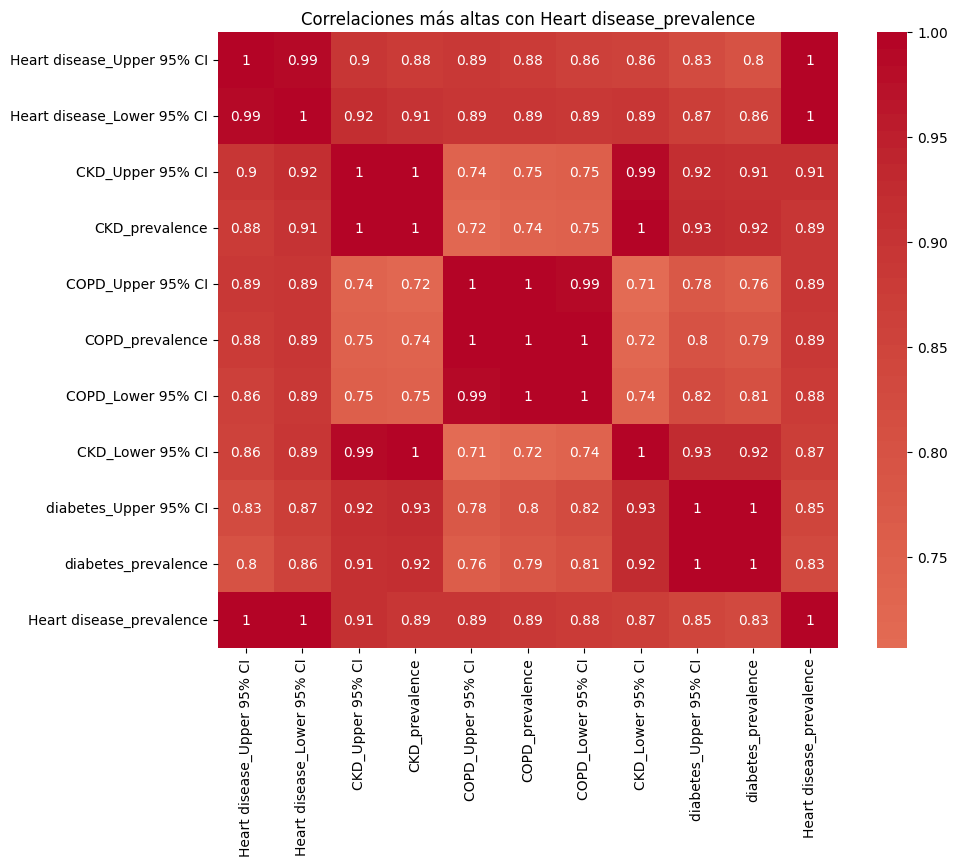

In [16]:
# Heatmap con solo las 10+ variables más correlacionadas con el target
# ========================================================================

# Esto hace zoom solo en lo más importante para no perderse en una sopa de 100 columnas

# Matriz de correlación (solo numéricas)
corr_matrix = df_raw.corr(numeric_only=True)

top_corr = corr_matrix[target].drop(target).abs().sort_values(ascending=False).head(10).index
subset_corr = df_raw[top_corr.tolist() + [target]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlaciones más altas con {target}")
plt.show()


In [17]:
# ◯ Análisis del heatmap de correlaciones altas
#    -------------------------------------------------------------------------------

# ¿Qué nos dice?
# 1. Variables con correlación casi perfecta (r > 0.99):
#         Heart disease_Upper 95% CI
#         Heart disease_Lower 95% CI
#         Algunas estimaciones de CKD y COPD (*_Upper, *_Lower)
#    No las uses como features, son derivadas directas del target.

# 2. Variables redundantes entre sí:
#         CKD_prevalence y CKD_Upper 95% CI → casi la misma info
#         COPD_prevalence y sus CI
#         diabetes_prevalence y diabetes_Upper 95% CI
#     En estos casos, conservá solo la variable de prevalencia principal, 
#     que es más directa y fácil de interpretar.

In [18]:
# ==============================================================
# CONCLUSION: Features finales sugeridos (BASADO EN TODO LO VISTO)
# ==============================================================
# Basado en todo lo visto, es recomendable usar como X solo estas columnas
# + la variable objetivo (target = 'Heart disease_prevalence'):

selected_features = [
    'CKD_prevalence',  # % de personas con enfermedad renal crónica (Chronic Kidney Disease)
    'COPD_prevalence',  # % de personas con enfermedad pulmonar obstructiva crónica
    'diabetes_prevalence',  # % de personas con diabetes
    'anycondition_prevalence',  # % de personas con al menos una condición crónica
    'CI90LBINC_2018',  # Límite inferior del intervalo de confianza al 90% del ingreso del hogar
    'Unemployment_rate_2018',  # Tasa de desempleo en 2018
    'Percent of adults with less than a high school diploma 2014-18',  # % de adultos sin diploma de secundaria (2014-2018)
    'PCTPOVALL_2018',  # % de la población total en situación de pobreza en 2018
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',  # Médicos de atención primaria por cada 100,000 hab. (2018)
    'Total nurse practitioners (2019)',  # Total de enfermeros/as profesionales en 2019
    'Heart disease_prevalence'  # 🎯 Target
]


In [19]:
# ==============================================================
# ✅ GENERAMOS df_baking: 
# ==============================================================
# Siempre es buena práctica trabajar sobre una copia (df_baking) del dataset original (df_raw) 
# para mantenerlo limpio y poder volver a él si es necesario.

# Creamos una copia del DataFrame original para trabajar
df_baking = df_raw.copy()
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


> **⭐CLEANING**

In [20]:
# ==============================================================
# ✅ FILTRO DE COLUMNAS: 
# ==============================================================

df_baking = df_baking[selected_features].copy()
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   CKD_prevalence                                                    3140 non-null   float64
 1   COPD_prevalence                                                   3140 non-null   float64
 2   diabetes_prevalence                                               3140 non-null   float64
 3   anycondition_prevalence                                           3140 non-null   float64
 4   CI90LBINC_2018                                                    3140 non-null   int64  
 5   Unemployment_rate_2018                                            3140 non-null   float64
 6   Percent of adults with less than a high school diploma 2014-18    3140 non-null   float64
 7   PCTPOVALL_2018                   

In [21]:
df_baking.sample(10,random_state=2025).T

,120,686,3098,1512,2836,4,2559,2727,2311,1306
CKD_prevalence,3.9,3.2,3.0,3.1,4.3,3.4,3.5,3.4,2.8,3.1
COPD_prevalence,11.4,8.8,6.9,9.4,10.2,10.5,9.2,7.2,6.7,9.4
diabetes_prevalence,14.6,11.5,10.4,12.0,17.7,13.5,13.5,14.2,9.3,11.0
anycondition_prevalence,49.7,47.9,43.8,52.0,51.1,46.3,48.7,47.8,34.9,48.2
CI90LBINC_2018,"41,133.0","47,905.0","54,812.0","43,848.0","50,866.0","46,157.0","53,581.0","42,009.0","71,366.0","50,126.0"
Unemployment_rate_2018,4.5,4.2,3.2,3.1,3.9,3.5,3.2,2.9,3.5,4.3
Percent of adults with less than a high school diploma 2014-18,15.3,12.3,9.4,12.9,21.4,19.8,9.4,21.5,6.4,7.6
PCTPOVALL_2018,14.6,12.9,10.9,16.0,12.3,13.2,10.9,16.5,8.1,10.8
Active Primary Care Physicians per 100000 Population 2018 (AAMC),79.9,99.6,94.6,86.6,90.3,77.2,72.9,72.9,117.5,97.8
Total nurse practitioners (2019),10.8,6.6,85.3,7.0,3.6,30.0,3.6,1.0,51.0,30.2


In [22]:
df_baking.describe().T

,count,mean,std,min,25%,50%,75%,max
CKD_prevalence,"3,140.0",3.4,0.6,1.8,3.1,3.4,3.8,6.2
COPD_prevalence,"3,140.0",9.1,2.3,3.5,7.3,8.9,10.6,19.9
diabetes_prevalence,"3,140.0",13.1,2.7,6.1,11.2,12.8,14.8,25.6
anycondition_prevalence,"3,140.0",46.8,6.4,22.0,42.9,47.2,51.0,66.2
CI90LBINC_2018,"3,140.0","48,594.5","13,598.0",0.0,"39,748.2","46,382.0","54,176.2","135,638.0"
Unemployment_rate_2018,"3,140.0",4.1,1.5,0.0,3.1,3.9,4.8,19.9
Percent of adults with less than a high school diploma 2014-18,"3,140.0",13.4,6.3,1.2,8.8,12.1,17.2,66.3
PCTPOVALL_2018,"3,140.0",15.2,6.1,0.0,10.8,14.1,18.3,54.0
Active Primary Care Physicians per 100000 Population 2018 (AAMC),"3,140.0",88.0,12.6,65.3,79.1,86.6,95.4,239.7
Total nurse practitioners (2019),"3,140.0",52.7,153.9,0.0,5.4,13.1,35.2,"3,937.8"


In [23]:
df_baking = df_baking.drop_duplicates().reset_index(drop = True)
df_baking.head()

,CKD_prevalence,COPD_prevalence,diabetes_prevalence,anycondition_prevalence,CI90LBINC_2018,Unemployment_rate_2018,Percent of adults with less than a high school diploma 2014-18,PCTPOVALL_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Heart disease_prevalence
0,3.1,8.6,12.9,47.6,53628,3.6,11.3,13.8,77.2,28.9,7.9
1,3.2,8.6,12.0,40.2,54437,3.6,9.7,9.8,77.2,113.2,7.8
2,4.5,12.1,19.7,57.5,31157,5.2,27.0,30.9,77.2,12.9,11.0
3,3.3,10.0,14.1,51.6,41283,4.0,16.8,21.8,77.2,11.6,8.6
4,3.4,10.5,13.5,46.3,46157,3.5,19.8,13.2,77.2,30.0,9.2


In [24]:
count_nan_zeros_uniques(df_baking)

,NaNs,Zeros,Uniques
CKD_prevalence,0,0,43
COPD_prevalence,0,0,137
diabetes_prevalence,0,0,163
anycondition_prevalence,0,0,351
CI90LBINC_2018,0,1,3028
Unemployment_rate_2018,0,1,103
Percent of adults with less than a high school diploma 2014-18,0,0,311
PCTPOVALL_2018,0,1,318
Active Primary Care Physicians per 100000 Population 2018 (AAMC),0,0,50
Total nurse practitioners (2019),0,0,3135


In [25]:
# ==============================================================
# 📌 ANÁLISIS DE VALORES ÚNICOS, CEROS Y NULOS EN FEATURES
# ==============================================================

# ✅ No se encontraron valores nulos en ninguna de las variables.
# ✅ Todas las variables presentan una buena cantidad de valores únicos, 
#    lo que indica variabilidad suficiente para el modelo.
# ⚠️ Algunas variables contienen al menos un valor igual a 0, lo cual podría ser:
#    - CI90LBINC_2018 (1 cero): ingreso del hogar con límite inferior igual a 0 → poco probable, pero aislado.
#    - Unemployment_rate_2018 (1 cero): tasa de desempleo 0% → posible en poblaciones pequeñas.
#    - PCTPOVALL_2018 (1 cero): porcentaje de pobreza igual a 0% → también posible, pero raro.
#    Debido a que ocurre solo una vez en cada caso, no se aplican imputaciones por ahora.
# ✅ No se identifican transformaciones necesarias adicionales (como log, binning, etc.)
# ⚙️ Se continuará con el escalado estándar (StandardScaler) antes de aplicar modelos regularizados.

# Conclusión: El dataset está en buenas condiciones para comenzar con la regresión lineal.

> **⭐DATASET DEFINITIVO**

In [26]:
# ==============================================================
# 🧊 CONGELAMOS EL DATASET DEFINITIVO (df)
# ==============================================================

# En este punto, ya realizamos:
# ✅ Selección de features relevantes para el modelo
# ✅ Limpieza de valores nulos y ceros extremos
# ✅ Drop the Duplicated 
# ✅ Verificación de outliers y distribución
# ✅ Análisis de correlaciones y redundancia
# ✅ Transformaciones adicionales necesarias (ninguna requerida en este caso)
# ⚠️ Todavía no hicimos el split ni el escalado de X

# Por lo tanto, este es el mejor momento para congelar el dataset definitivo.
# `df` es la versión final y completa, sin separación ni transformación,
# y se usará como base para crear X, y, escalado y división en train/test.

df = df_baking.copy()

### 🧱 MODELO BASE: REGRECION LINEAL  

>✅ Objetivo: 
>* EscalaDO
>* Separar X e y a partir de df

>* Hacer train_test_split

In [27]:
# ===========================================================================================
# ⭐⭐⭐ ESCALAR DF ⭐⭐⭐
# ===========================================================================================

# IMPORTACIÓN DE LIBRERÍAS
# -------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler          # Genera el Escalado de features
import numpy as np


# 1️. DEFINIR VARIABLES A ESCALAR (Solo columnas numericas, y sin el Target)
# -------------------------------------------------------------------------------------------

data_types = df.dtypes
    # Extrae los tipos de datos de cada columna del DataFrame df. 
    # Esto devuelve una serie donde el índice son los nombres de las columnas y el valor es 
    # el tipo de dato (float64, int64, object, etc.).

numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]
    # Filtra solo las columnas numéricas (excluye las que son tipo object, como strings)
    # Excluye específicamente la columna 'Heart disease_number', que tal vez sea la variable objetivo y no debe escalarse
    # Resultado: numeric_columns es una lista con todos los nombres de columnas numéricas que queremos escalar.


# 2. ESCALADO DE FEATURES
# -------------------------------------------------------------------------------------------

scaler = StandardScaler()                        
    # Escalador estándar: media 0, desviación estándar 1

norm_features = scaler.fit_transform(df[numeric_columns])          
    # fit_transform() Calcula media y std para cada columna numerica y transforma los valores.
    # norm_features es ahora una matriz NumPy con los datos escalados.


df_scaled = pd.DataFrame(norm_features, index = df.index, columns = numeric_columns) 
    # Crear nuevo DataFrame con datos escalados
    # Conserva los mismos nombres de columnas y el mismo índice que df

df_scaled["Heart disease_prevalence"] = df["Heart disease_prevalence"] 
    # Reagregar la variable objetivo (sin escalar)
    # Añade de vuelta la columna 'Heart disease_number' sin escalar, como última columna.
    # Esto se hace porque:
    #     Es la variable target (etiqueta), que no se debe escalar.
    #     Así se puede usar df_scaled directamente para modelar.


df_scaled.head().T  # Vista previa del nuevo dataset


# ✅ ¿Qué resultado produce?
# Un DataFrame llamado df_scaled que contiene:
#     Todas las variables numéricas escaladas
#     La columna 'Heart disease_number' original sin escalar (como target)



,0,1,2,3,4
CKD_prevalence,-0.6,-0.4,1.9,-0.3,-0.1
COPD_prevalence,-0.2,-0.2,1.3,0.4,0.6
diabetes_prevalence,-0.1,-0.4,2.4,0.4,0.2
anycondition_prevalence,0.1,-1.0,1.7,0.8,-0.1
CI90LBINC_2018,0.4,0.4,-1.3,-0.5,-0.2
Unemployment_rate_2018,-0.4,-0.4,0.7,-0.1,-0.4
Percent of adults with less than a high school diploma 2014-18,-0.3,-0.6,2.1,0.5,1.0
PCTPOVALL_2018,-0.2,-0.9,2.6,1.1,-0.3
Active Primary Care Physicians per 100000 Population 2018 (AAMC),-0.9,-0.9,-0.9,-0.9,-0.9
Total nurse practitioners (2019),-0.2,0.4,-0.3,-0.3,-0.1


In [28]:
# =================================================================================================================
# ⭐⭐⭐ SELECCIÓN AUTOMÁTICA DE VARIABLES PREDICTORAS (FEATURE SELECTION) con SelectKBest (f-regression) ⭐⭐⭐
# ================================================================================================================

# ¿Qué hace este código?
    # - Toma tu dataset df_scaled y separa features (X) y target (y)
    # - Divide en train/test (80/20)
    # - Calcula qué features están más correlacionadas con y usando f_regression
    # - Se queda con el 30% de las mejores variables
    # - Crea un nuevo X_train_sel y X_test_sel solo con esas features
    # - Evita data leakage porque se ajusta solo con X_train


# IMPORTACIÓN DE LIBRERÍAS
# -------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression                                                            # Selector de variables basado en alguna métrica

    # train_test_split: para dividir datos en entrenamiento y test
    # SelectKBest: selector de variables basado en alguna métrica
    # f_regression: métrica basada en correlación lineal (ideal para regresión)


# SEPARAR VARIABLES INDEPENDIENTES (X) y VARIABLE DEPENDIENTE (y).
# -------------------------------------------------------------------------------------------

X = df_scaled.drop(columns=["Heart disease_prevalence"])  # Variables Predictoras (Features) 
y = df_scaled["Heart disease_prevalence"]                 # Variable Objetivo (Target)



# DIVISIÓN EN TRAIN Y TEST
# ------------------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Con train_test_split se divide en train (80%) y test (20%), 
    # manteniendo la reproducibilidad (random_state=42)


train_indices = list(X_train.index)
test_indices = list(X_test.index)
    
    # Guarda los índices de los conjuntos de entrenamiento y test, por si más adelante 
    # se necesitás mapear a otras estructuras (rastrear valores originales)
    # (por ejemplo, para recuperar valores originales).


# DEFINICION CUANTAS VARIABLES SELECCIONAR
# ------------------------------------------------------------------------------------------

k = int(len(X_train.columns) * 0.3)

    # Toma el 30% de las columnas originales (número de mejores features)
    # Por ejemplo, si hay 10 columnas → seleccionará las 3 mejores



# DEFINICION DE VARIABLES RELEVANTES
# --------------------------------------------------------------

# ▶ APLICAR SelectKBest CON f_regression

selection_model = SelectKBest(score_func = f_regression, k = k)

    # score_func = f_regression: mide cuánto se relaciona cada feature con "y" usando una prueba F
    # k: cuántas features quedarte

    # Usamos SelectKBest para quedarnos solo con las variables más relevantes.
    # La función score_func = f_regression evalúa cada feature por separado
    # midiendo su relación lineal con la variable objetivo (y).

    # ¿Cómo lo hace?
    # - Calcula la correlación entre cada feature Xᵢ y la variable y.
    # - Usa una prueba estadística F para comparar cuánta varianza de y explica Xᵢ.
    # - Cuanto mayor el F-score, más importante es la variable para el modelo.

    # Este método es rápido y muy útil en regresiones lineales (como Lasso, Ridge, etc.)
    # porque ayuda a eliminar variables que no aportan información significativa.


# ▶ APLICAR SELECTOR A LOS DATOS DE ENTRENAMIENTO: 

selection_model.fit(X_train, y_train)
    # Ajustamos solo con el conjunto de entrenamiento para evitar data leakage

    # Importante: el ajuste (fit) se hace solo sobre los datos de entrenamiento (X_train)
    # para evitar data leakage.



    # DATA LEAKAGE:
     
    # - Es cuando tu modelo accede (directa o indirectamente) a información 
    #   del conjunto de test o del futuro durante el entrenamiento. 
    #   Es decir, El modelo "ve" cosas que no debería saber al momento de aprender, y por
    #   eso rinde muy bien en validación… pero falla en producción.

    # Ejemplos Comunes:
    # - Escalar con todo el dataset antes de train_test_split
    # - Seleccionar features antes del split#
    # - Usar columnas que indirectamente contienen el target


    # ¿Por qué es tan grave?
    # - Da una falsa sensación de buen rendimiento
    # - El modelo falla al aplicarse en la vida real
    # - Puede invalidar todo un proyecto si no se detecta a tiempo

    # Regla de oro:
    #  - Nunca dejes que el modelo vea nada del conjunto de test durante el entrenamiento, 
    #    ni directa ni indirectamente.


# EXTRAER LAS VARIABLES SELECCIONADAS
# --------------------------------------------------------------

# ▶ IDENTIFICAR VARIABLES SELECCIONADAS
    # Devuelve un array booleano ix , indicando qué features fueron seleccionadas con true

ix = selection_model.get_support()


# ▶ GENERACION DE NUEVO DATAFRAME para X_train y X_test:
    # - Solo con las variables seleccionadas (las mejores según su correlación con y)
    # - Las columnas seleccionadas conservan su nombre


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

# REVISAMOS EL NUEVO DATAFRAME REDUCIDO
# --------------------------------------------------------------
print(f"Número de variables seleccionadas: {X_train_sel.shape[1]}")
X_train_sel.head()




# ✅ RESULTADO FINAL
# --------------------------------------------------------------
    # - X_train_sel y X_test_sel tienen solo las mejores variables predictoras
    # - Estas pueden usarse directamente en modelos más eficientes, especialmente en Lasso o Ridge

# ⚠️ NOTA IMPORTANTE
# --------------------------------------------------------------
    # Este tipo de selección debe hacerse SOLO con el X_train, tal como lo hicimos, 
    # para evitar data leakage (usar información del test set para elegir variables).

# ✅ ¿Próximo paso?
# --------------------------------------------------------------
    # Podemos:
    # - Analizar las features seleccionadas (ver cuáles quedaron)
    # - Entrenar un modelo Lasso con estas features y comparar con la versión sin selección




Número de variables seleccionadas: 3


,CKD_prevalence,COPD_prevalence,diabetes_prevalence
0,0.6,0.9,0.2
1,0.1,0.3,0.0
2,-1.0,0.0,-0.3
3,-0.8,-0.4,-0.7
4,-0.1,0.2,-0.2


# ACA QUEDE 

In [29]:
from sklearn.linear_model import LinearRegression         # Modelo base de Regresion Lineal
from sklearn.metrics import r2_score, mean_squared_error  # Métricas de Evaluacion

# ----------------------------------------------------------------------------------------
# 4️. ENTRENAMIENTO DEL MODELO LINEAL
# ----------------------------------------------------------------------------------------
lin_reg = LinearRegression()           # Creamos el modelo de regresión lineal
lin_reg.fit(X_train, y_train)          # EAjustamos el modelo a los datos de entrenamiento (Entrenamiento del Modelo)


# ---------------------------------------------------------------------------------------
# 5️. PREDICCIÓN Y EVALUACIÓN
# ---------------------------------------------------------------------------------------
y_pred = lin_reg.predict(X_test)       # Generamos predicciones sobre el conjunto de prueba

r2 = r2_score(y_test, y_pred)          # Calculamos R² → qué tan bien el modelo explica la variabilidad
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Error cuadrático medio → medida de precisión (en la misma unidad que y) 

print(f"R² score (Linear Regression): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")



# ------------------------------------------------------------------------------------
# 6️. ANÁLISIS DE COEFICIENTES DEL MODELO
# ------------------------------------------------------------------------------------
# Evaluamos la importancia (peso) de cada feature en la predicción
coef_df = pd.DataFrame({
    'Feature': X.columns,               # Nombre de cada feature
    'Coefficient': lin_reg.coef_        # Peso asignado por el modelo lineal a cada feature
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Ordenados por magnitud (impacto)

print("\nTop coeficientes (ordenados por magnitud):")
display(coef_df) # Mostramos los coeficientes en tabla

R² score (Linear Regression): 0.9493
RMSE (Root Mean Squared Error): 0.4045

Top coeficientes (ordenados por magnitud):


,Feature,Coefficient
0,CKD_prevalence,1.4
1,COPD_prevalence,0.9
2,diabetes_prevalence,-0.5
7,PCTPOVALL_2018,-0.2
3,anycondition_prevalence,0.2
6,Percent of adults with less than a high school...,-0.1
5,Unemployment_rate_2018,-0.1
4,CI90LBINC_2018,-0.1
8,Active Primary Care Physicians per 100000 Popu...,-0.0
9,Total nurse practitioners (2019),-0.0


¿Próximo paso?
Si te parece bien, ahora podemos:  
* Entrenar un modelo base de LinearRegression  
* Evaluarlo con R²  

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

NameError: name 'total_data_scal' is not defined

In [ ]:
X_test_sel.head()

In [ ]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [ ]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

In [ ]:
X_test_sel.head()

## Logistic Regression model  
  *  Entrenar LinearRegression
   * Evaluar: R², RMSE, y analizar coeficientes

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

In [ ]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

## Model optimization

In [ ]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

In [ ]:
from pickle import dump

dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))